# Logistic Regression on preloaded Digits Dataset 

see [“Logistic Regression using Python (scikit-learn)” by Michael Galarnyk](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a), Data Scientist at [Scripps Research Institute](https://www.scripps.edu/). 

## Notebooks 
- [Digits Logistic Regression](https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/Logistic_Regression/LogisticRegression_toy_digits_Codementor.ipynb)
- [MNIST Logistic Regression](https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/Logistic_Regression/LogisticRegression_MNIST_Codementor.ipynb) 

## Videos 
- [Logistic Regression using Python (Sklearn, NumPy, MNIST, Handwriting Recognition, Matplotlib)](https://www.youtube.com/watch?v=71iXeuKFcQM)

## Documentation 
- [sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

### 1. Loading the Data (Digits Dataset) 

The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the digits dataset.

In [1]:
%matplotlib inline
from sklearn.datasets import load_digits
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

import seaborn as sns
# sns.set()

In [2]:
digits = load_digits()
type(digits)

sklearn.utils.Bunch

Now that you have the dataset loaded you can use the commands below

In [3]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


### 2. Showing the Images and Labels (Digits Dataset)

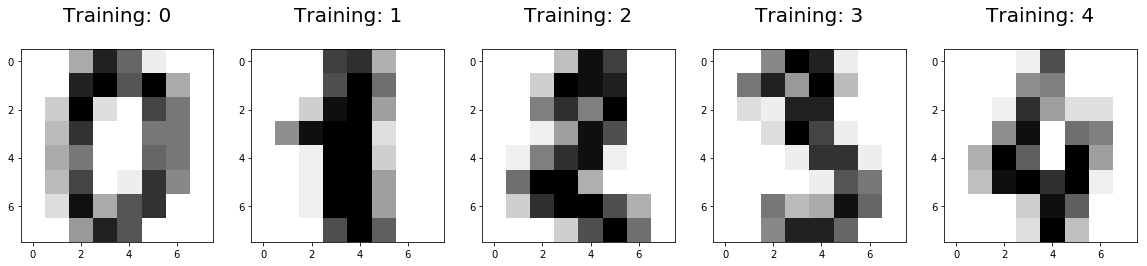

In [4]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    xticks_val = [0, 2, 4, 6, 8]
    xticks_lab = ['0', '2', '4', '6', '8']
    yticks_val = [0, 2, 4, 6, 8]
    yticks_lab = ['0', '2', '4', '6', '8']
    plt.xticks(xticks_val, xticks_lab)
    plt.yticks(yticks_val, yticks_lab)
    plt.imshow(np.reshape(image, (8,8)), cmap='binary')
    plt.title('Training: %i\n' % label, fontsize = 20)

### 3. Splitting Data into Training and Test Sets (Digits Dataset)

In [5]:

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=1/7.0, random_state=11)

### 4. Scikit-learn 4-Step Modeling Pattern (Digits Dataset)

**4.1** Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [6]:
from sklearn.linear_model import LogisticRegression

**4.2** Make an instance of the Model

In [7]:
logisticRegr = LogisticRegression()

**4.3** Training the model on the data, storing the information learned from the data

Fits the model with regards to the relationship between x (digits) and y (labels)

In [8]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**4.4** Predicts the labels of new data (new images)

Uses the information the model learned during the model training process

In [9]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(X_test[0].reshape(1,-1))

array([0])

In [10]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(X_test[0:10])

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0])

In [11]:
# Make predictions on entire test data
predictions = logisticRegr.predict(X_test)

### Measuring Model Performance (Digits Dataset)

While there are other ways of measuring model performance, we are going to keep this simple and use accuracy as our metric. To do this are going to see how the model performs on the test dataset. 

*Accuracy* is defined as the fraction of *correct* predictions: 

    correct predictions / total number of data points

In [12]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.966666666667


### Confusion Matrix (Digits Dataset)

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 

**Confusion Matrix with Seaborn**

In [13]:
cm = metrics.confusion_matrix(y_test, predictions)

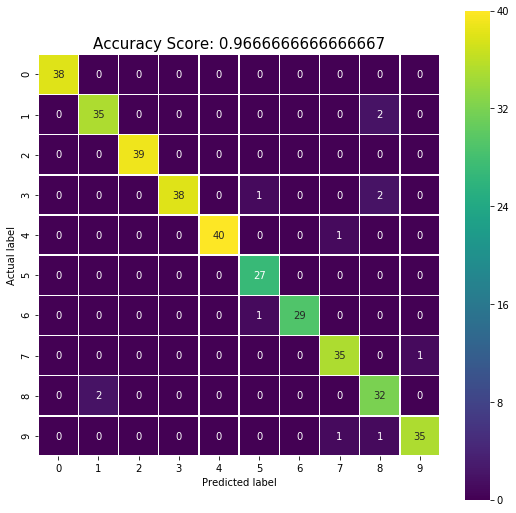

In [14]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show();

--- 